Привет! Меня зовут Исмаил, я буду проверять твой проект :) Можешь обращаться ко мне на «ты». Если тебе комфортно, то и я буду к тебе так обращаться, если нет, то обязательно скажи об этом.

Пожалуйста, не удаляй мои комментарии, которые я буду оставлять в работе. Это особенно поможет, если твои проекты будут отправлены на повторную проверку. При повторных проверках у комментариев будут приписки: "Вторая итерация", "Третья итерация" и т.д. 

Ты тоже можешь реагировать на мои комментарии, но в таком случае постарайся, чтобы твои комментарии отличались от моих: например, выделяй их своим любимым цветом — так у нас не возникнет путаницы :)

Кстати, про цвета! Мои комментарии будут в следующей цветовой гамме: зелеными, желтыми и красными. Например:

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>
    
В случае, если решение на отдельном шаге является полностью правильным. </div>

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
В случае, если решение может стать еще лучше с некоторыми корректировками </div>
 
<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 
    
В случае, если решение какого-то шага требует значительных изменений. Проект не может быть принят с первого раза, если ревью содержит комментарии, помеченные этим цветом </div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


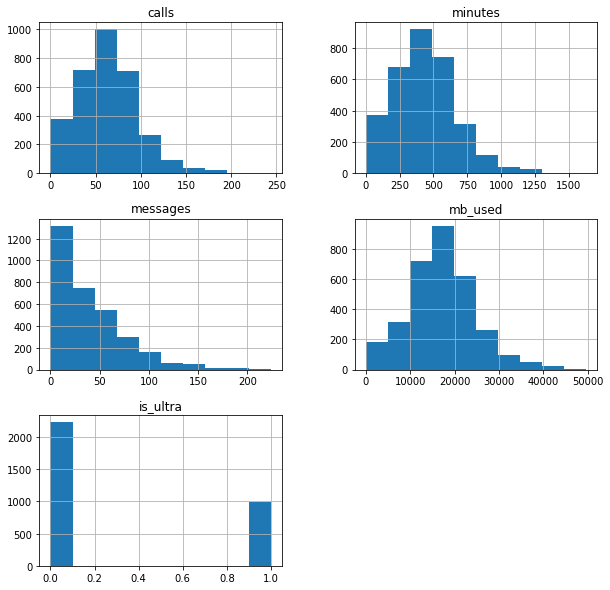

In [5]:
df.hist(figsize=(10, 10));

<div class="alert-success"> 
<b>Комментарий ревьюера 👍</b>

Хороший первичный анализ данных

## Разбейте данные на выборки

Разделим исходные данные на обучающую, валидационную и тестовую выборки. Применим соотношение 3:1:1, валидационную и тестовую выборку сделаем равными.

In [6]:
df_train, df_test = train_test_split(df, test_size=0.20, random_state=12345)

In [7]:
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=12345)

In [8]:
# Посмотрим итоговый результат
display(df_train.shape)
display(df_valid.shape)
df_test.shape

(1928, 5)

(643, 5)

(643, 5)

<div class="alert-success"> 
<b>Комментарий ревьюера 👍</b>

Выборки разделены верно, здорово, что проверены их размеры

## Исследуйте модели

Исследуем качество разных моделей, меняя гиперпараметры. 

In [9]:
features = df_train.drop('is_ultra', axis=1)
target = df_train['is_ultra']
valid_features = df_valid.drop('is_ultra', axis=1)
valid_target = df_valid['is_ultra']

In [17]:
# Создадим модель дерева решений c перебором гиперпараметра max_depth.
for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features, target)
    predictions_valid = model.predict(valid_features)
    print('max_depth =', depth, ': ', end='')
    print(accuracy_score(valid_target, predictions_valid))

max_depth = 1 : 0.7387247278382582
max_depth = 2 : 0.7573872472783826
max_depth = 3 : 0.7651632970451011
max_depth = 4 : 0.7636080870917574
max_depth = 5 : 0.7589424572317263


<font color='Blue'><b>Лучший показатель max_depth - 3.</b></font><br><br>


<div class="alert-danger"> 
<b>Комментарий ревьюера ❌ Вторая итерация </b> 

Рассмотрен только один гиперпараметр. Хотелось бы видеть перебор значений и у других гиперпараметров

In [25]:
for nodes in range(2, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=3, max_leaf_nodes=nodes)
    model.fit(features, target)
    predictions_valid = model.predict(valid_features)
    print('max_leaf_nodes = ', nodes, ': ', end='')
    print(accuracy_score(valid_target, predictions_valid))

max_leaf_nodes =  2 : 0.7387247278382582
max_leaf_nodes =  3 : 0.7573872472783826
max_leaf_nodes =  4 : 0.7651632970451011
max_leaf_nodes =  5 : 0.7651632970451011
max_leaf_nodes =  6 : 0.7651632970451011
max_leaf_nodes =  7 : 0.7651632970451011
max_leaf_nodes =  8 : 0.7651632970451011
max_leaf_nodes =  9 : 0.7651632970451011


<font color='Blue'><b>Лучший показатель max_leaf_nodes - 9.</b></font><br><br>

In [38]:
for samples in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_leaf_nodes=9, min_samples_leaf=samples)
    model.fit(features, target)
    predictions_valid = model.predict(valid_features)
    print('min_samples_leaf =', samples, ': ', end='')
    print(accuracy_score(valid_target, predictions_valid))

min_samples_leaf = 1 : 0.7776049766718507
min_samples_leaf = 2 : 0.7776049766718507
min_samples_leaf = 3 : 0.7776049766718507
min_samples_leaf = 4 : 0.7776049766718507
min_samples_leaf = 5 : 0.7776049766718507
min_samples_leaf = 6 : 0.7776049766718507
min_samples_leaf = 7 : 0.7776049766718507
min_samples_leaf = 8 : 0.7776049766718507
min_samples_leaf = 9 : 0.7776049766718507


<font color='Blue'><b>Параметр min_samples_leaf примем за значение по умолчанию - 1.</b></font><br><br>


In [41]:
model = DecisionTreeClassifier(random_state=12345, max_depth=3, max_leaf_nodes=9, criterion='gini', min_samples_leaf=1)
model.fit(features, target)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=9, random_state=12345)

In [42]:
predictions_valid = model.predict(valid_features)
result_accuracy = accuracy_score(valid_target, predictions_valid)
print('Точность первой модели:', result_accuracy)

Точность первой модели: 0.7651632970451011


In [ ]:
# Создадим модель случайного леса c перебором гиперпараметра n_estimators.
for est in range(1, 50):
    model2 = RandomForestClassifier(random_state=12345, n_estimators=est)
    model2.fit(features, target)
    predictions_valid = model2.predict(valid_features)
    print('n_estimators =', est, ': ', end='')
    print(accuracy_score(valid_target, predictions_valid))

<font color='Blue'><b>Лучший показатель n_estimators - 44.</b></font><br><br>


<div class="alert-danger"> 
<b>Комментарий ревьюера ❌ Вторая итерация </b> 

Аналогично с прошлым комментарием, у леса можно много чего глянуть

In [47]:
for depth in range(1, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=44, max_depth=depth)
    model.fit(features, target)
    predictions_valid = model.predict(valid_features)
    print('max_depth =', depth, ': ', end='')
    print(accuracy_score(valid_target, predictions_valid))

max_depth = 1 : 0.7402799377916018
max_depth = 2 : 0.7620528771384136
max_depth = 3 : 0.776049766718507
max_depth = 4 : 0.7744945567651633
max_depth = 5 : 0.7791601866251944
max_depth = 6 : 0.7822706065318819
max_depth = 7 : 0.7869362363919129
max_depth = 8 : 0.7869362363919129
max_depth = 9 : 0.7900466562986003


<font color='Blue'><b>Лучший показатель max_depth - 9.</b></font><br><br>

In [55]:
for nodes in range(2, 30):
    model = RandomForestClassifier(random_state=12345, n_estimators=44, max_depth=9, max_leaf_nodes=nodes)
    model.fit(features, target)
    predictions_valid = model.predict(valid_features)
    print('max_leaf_nodes = ', nodes, ': ', end='')
    print(accuracy_score(valid_target, predictions_valid))

max_leaf_nodes =  2 : 0.7402799377916018
max_leaf_nodes =  3 : 0.7636080870917574
max_leaf_nodes =  4 : 0.7698289269051322
max_leaf_nodes =  5 : 0.7744945567651633
max_leaf_nodes =  6 : 0.776049766718507
max_leaf_nodes =  7 : 0.7807153965785381
max_leaf_nodes =  8 : 0.7791601866251944
max_leaf_nodes =  9 : 0.7807153965785381
max_leaf_nodes =  10 : 0.7822706065318819
max_leaf_nodes =  11 : 0.7807153965785381
max_leaf_nodes =  12 : 0.7807153965785381
max_leaf_nodes =  13 : 0.7822706065318819
max_leaf_nodes =  14 : 0.7838258164852255
max_leaf_nodes =  15 : 0.7853810264385692
max_leaf_nodes =  16 : 0.7838258164852255
max_leaf_nodes =  17 : 0.7838258164852255
max_leaf_nodes =  18 : 0.7853810264385692
max_leaf_nodes =  19 : 0.7884914463452566
max_leaf_nodes =  20 : 0.7884914463452566
max_leaf_nodes =  21 : 0.7900466562986003
max_leaf_nodes =  22 : 0.7900466562986003
max_leaf_nodes =  23 : 0.7900466562986003
max_leaf_nodes =  24 : 0.7916018662519441
max_leaf_nodes =  25 : 0.7916018662519441
m

<font color='Blue'><b>Лучше оставим параметр max_leaf_nodes по умалчанию - None</b></font><br><br>

In [48]:
model2 = RandomForestClassifier(random_state=12345, n_estimators=44, max_depth=9)
model2.fit(features, target)

RandomForestClassifier(max_depth=9, n_estimators=44, random_state=12345)

In [49]:
predictions_valid2 = model2.predict(valid_features)
result_accuracy2 = accuracy_score(valid_target, predictions_valid2)
print('Точность второй модели:', result_accuracy2)

Точность второй модели: 0.7900466562986003


In [ ]:
model3 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model3.fit(features, target)

In [ ]:
predictions_valid3 = model3.predict(valid_features)

In [ ]:
result_accuracy3 = accuracy_score(valid_target, predictions_valid3)
print('Точность третьей модели:', result_accuracy3)

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡 Вторая итерация  </b>

Тут тоже хотелось бы видеть перебор значений 

Обученная модель дерева решений с максимальной глубиной 3 дает качество 0.76. Модель случайного леса с колличеством деревьев 44  дает качество 0.79. Модель логистической регрессии показала худший результат - 0.72.

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌ Ко всему пункту </b> 

Недостаточно просто безосновательно подставить какие-то значения гиперпараметров и все. Нужен перебор - например, с помощью циклов

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡 Ко всему пукнту </b> 
    
accuracy - это не точность, а доля правильных ответов. Точность - другая метрика классификации, precision

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡 Вторая итерация. Ко всему пукнту </b> 
    
Лучше не выводить промежуточные результаты, это громоздко. Если хочешь посмотреть изменение метрики в зависимости от значения перебираемого параметра, то лучше построить график

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡 Вторая итерация. Ко всему пукнту </b> 
    
Для более красивого оформления кода можно использовать f-strings. Подробнее про них почитать можешь здесь или на любом другом сайте: https://python-scripts.com/f-strings

<font color='Blue'><b>При подборе гиперпараметров с помощью циклов лучшая модель случайного леса хорошо справилась и с тестовой выборкой (0.79), поэтому остановимся на ней. </b></font><br><br>

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 Третья итерация </b>

Ага, уже здорово, только необязательно для каждого гиперпараметра создавать отдельную ячейку - можно сделать в одной (для каждой модели) с помощью подциклов. Или с GridSearch

## Проверьте модель на тестовой выборке

In [ ]:
test_features = df_test.drop('is_ultra', axis=1)
test_target = df_test['is_ultra']

In [ ]:
test_predictions = model.predict(test_features)

In [ ]:
test_accuracy = accuracy_score(test_target, test_predictions)
print('Точность первой модели:', test_accuracy)

In [ ]:
test_predictions2 = model2.predict(test_features)

In [ ]:
test_accuracy2 = accuracy_score(test_target, test_predictions2)
print('Точность второй модели:', test_accuracy2)

Качество на тестовой выборке получилась 0.78 при использовании модели дерева решений и 0.79 при использовании модели случайного леса.

Выводы: Мы обучили 3 модели и протестировали 2 успешных модели, из них модель случайного леса показывает худшие результаты на тестировании, а модель дерева решений наоборот лучшую, на ней мы и остановимся. 

<font color='Blue'><b>При подборе гиперпараметров с помощью цикла лучшая модель случайного леса хорошо справилась и с тестовой выборкой (0.79), поэтому остановимся на ней. </b></font><br><br>

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Модели проверены на тесте


## (бонус) Проверьте модели на адекватность

Сравним метрики модели с метрикой полученной с помощью простейшей модели. Для классифиации обычно в качестве такой "игрушечной" модели используют константное предсказание наиболее часто встречаемым классом (для регрессии обычно предсказание медианой целевого признака). Можно либо вручную составить вектор предсказаний с одинаковыми значениями, либо использовать DummyClassifier из sklearn.

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
model2 = DummyClassifier()

In [ ]:
model2.fit(features, target)

In [ ]:
predictions_valid2 = model2.predict(valid_features)

In [ ]:
result_accuracy2 = accuracy_score(valid_target, predictions_valid2)
result_accuracy2

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Можно проще, посмотреть на баланс классов: например, если у нас 90 процентов таргета это "1", а остальные "10" - 0, то мы можем тупо выдавать каждый раз цифру 1 и получать метрику 90 %. Любая модель, которая будет выдавать качество ниже этого - плохая/неадекватная

dummy classifier с strategy='most_frequent' работает так же: смотрит на самый часто встречающийся класс и выдает только его (только одно значение - константу, поэтому это константная модель)

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b>

Сперва похвалю за наличие везде промежуточных выводов, комментариев. Хороший код, показываешь навыки владения sklearn. Все требуемые пункты в задании в целом выполнены. 

В этом проекте большое внимание уделяется подбору гиперпараметров, но это можно автоматизировать! Советую почитать на досуге про GridsearchCV и Optuna, будет полезно. Также можно добавить визуализацию в проект: посмотреть на графиках, как влияет перебор параметров на результат нашей метрики
    
Также отправляю ссылки на документации некоторых моделей для классификации: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html, https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    
Что обязательно стоит доработать: добавить перебор значений гиперпараметров
    
Из курсов и дополнительной информации советую Yandex ML Handbook (https://academy.yandex.ru/handbook/ml) и курсы Евгения Соколова на ФКН (Машинное обучение - 1 с математикой https://github.com/esokolov/ml-course-hse и Основы машинного обучения без глубокой математики https://github.com/hse-ds/iad-intro-ds) - там можешь получить дополнительную информацию, более глубокую, возможно. http://wiki.cs.hse.ru/Заглавная_страница - тут можешь глянуть записи семинаров и лекций и другие материалы соответствующих курсов. 
    
Буду ждать доработок, удачи!

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌ Вторая итерация </b>

Оставил еще несколько комментариев, в том числе красные. Стоит расширить кол-во иследуемых гиперпараметров

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 Третья итерация </b>

Все критические ошибки исправлены, проект стал еще лучше, принимаю. Успехов в дальнейшей учебе!

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [ ] Весь код исполняется без ошибок
- [ ] Ячейки с кодом расположены в порядке исполнения
- [ ] Выполнено задание 1: данные загружены и изучены
- [ ] Выполнено задание 2: данные разбиты на три выборки
- [ ] Выполнено задание 3: проведено исследование моделей
    - [ ] Рассмотрено больше одной модели
    - [ ] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [ ] Написаны выводы по результатам исследования
- [ ] Выполнено задание 3: Проведено тестирование
- [ ] Удалось достичь accuracy не меньше 0.75
